<br>
Assignment 2 TU914/3
<br>
Name : Najla Alsafadi C20312866
<br>Lecture : Dr. Muhammed Atif Qureshi
<br>Module : Info Management for Data Science

# Task 1 


**Differentiate among data engineer, data analysts and data scientist**
* **Data Analyst**  role is to extracts specific information from a pool of data in the proccess called data analytics. This can include procedures such as data cleaning and creating data visualization. Data analyist isn't directly involved in decision makking in a company but can still proved the necessary statistical information about a company.

* **Data Scientist** uses statistics and machine learning to create predictions. The data scientist will be able to do some tasks like data cleaning and visualization similar to the data analyst but will have better expertise in these skills and also use machine learning. Unlike data anlayst, data scientist also directly assist companies in making data driven decisions.

* **Data Engineer** role is to create systems that will allow the data analysts and scientists to use in their work. They are responsible for making sure the data being used is accesible for those that require it. They make sure the data is correctly stored, recieved and transformed. They also develop and make sure that data pipelines are maintained. 



 












**Generator vs Return**
Generators are iterators that return generator object. It is a lazy intialisation method. This means it doesn't store the conent of the data in memory. It can be used to iterate a piece of data one at a time and loads the generator object only when it is required. Unlike normal funtions with Return, generators use a yield expresion. Both return the value but yield mantains the state in memory for it to be used again and return just returns the value and ends the funtions..If return was then called again it would start again while Yield remembers its state and can conitinue from its last excecution.

**Which would benefit memory efficiency, why should we prefer one over the other while process big data?**
 Generators are more memory effiecient because they return and store the data only when its is required. It doesn't need to process every line but saves the state which causes it to be more memory efficient.  Generator is more beneficial in proccessing big data as it doesn't need to load all the data in to memory in one go, it also works in lazy evaluation strategy which means that it delays the evaluation of data until its required and works on-demand. It can also be used to create memory efficient pipelines.


# Task 2

**What is the use of EDA and the infromation needed for it**
It is an exploration technique that uses various graphical and statitical strategies to help understand the data. There are some requirements to undertsanding the data correctly.The data has to be clean for example with no null values and unecessary things in the data to avoid affecting the accuracy of the conclusion made from the analysis. We also have to understand the relationship between the variables in the data which gives a better perspective on the data. This can help derive and create conclusions that can be used to further interpret the data.


# Task 3

In [224]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

**1.Histogram**

The histogram is used to display the disrbution of infromation over time. In this case we can exam the varie length of petals vs the frequency in which they occur. This method can be used to graphically dispay and analyse distributions.

This histogram examines the versicolour petal length. The Highest frequency of petal length is 13 and is approximately between 4.5 and 4.7cm. The lowest frequency is 1 with petal length between 3-3.3cm. The general distribution skewed to the right.

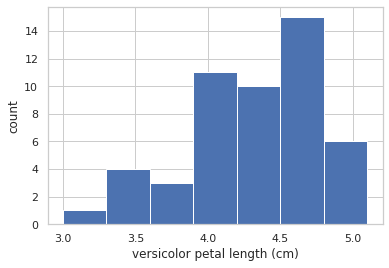

In [225]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
iris = datasets.load_iris()

iris['target_names']
fn_test = lambda x: {0: 'Setosa', 1: 'Versicolour', 2: 'Virginica'}[x]
def simple_fn_test(x):
  
  d = {0: 'Setosa', 1: 'Versicolour', 2: 'Virginica'}
  return d[x]
iris.data[51], iris.target[51]

X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names) 
full_df = df.copy(deep=True)
full_df['Target']=y
full_df['Target_Text'] = full_df.Target.apply(fn_test)
full_df.head(n=3)

versicolor_petal_length = full_df[full_df['Target'] == 1]['petal length (cm)']  # Iris-Versicolour

# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
plt.hist(versicolor_petal_length, bins=n_bins)

# Label axes
_ = plt.xlabel('versicolor petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()






**2.Bee Swarm Plot**

The bee plot can be used to show the density of information given. It can allow us to see the max and min values of each value and also which occurs the most base on the denisty of the plots.

From the Bee Plot we can see that the virgincia petals are mostly the longest of all three and the setosa is mostly the shortest.

The vigincia ranges between 4.5 - 7 with the most occurences of length being at 5 and 6cm.

The versicolour ranges between 3 and 5.1 with the most occurences in length being at 4.5cm.

The setosa ranges between 1 and 2cm with the most occurences in length being 1.5cm.

In [226]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
iris = datasets.load_iris()

# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='Target_Text', y='petal length (cm)', data=full_df) 

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


**3.Empirical Cumulative Distribution Function**

ECDF is useful to understanding the distributions similar to histogrms. However ECDF are better to visualize data and show the percentiles. It also doesnt have bins like the histogram which help avoid bining bias.
It can also tell you if there is an overlap of data in certain percentiles.

For the below ECDF diagram we can see the range of lengths similary to the bee plot but also in terms of percentile distribution. So for example at 4.4cm and 0.6 we can see an overlap with versicolour and vriginica. Virginica also appears to have a more normal distribution as opposed to the other two.




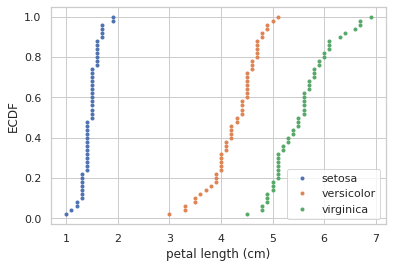

In [227]:
def ecdf(data):

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data) 

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

setosa_petal_length = full_df[full_df['Target'] == 0]['petal length (cm)']  # Iris-Setosa
versicolor_petal_length = full_df[full_df['Target'] == 1]['petal length (cm)']  # Iris-Versicolour
virginica_petal_length = full_df[full_df['Target'] == 2]['petal length (cm)']  # Iris-Virginica

x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
plt.plot(x_set, y_set, marker='.', linestyle='none')
plt.plot(x_vers, y_vers, marker='.', linestyle='none')
plt.plot(x_virg, y_virg, marker='.', linestyle='none')


# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

**4.Box Plot**

Similar to the bee plot the box plot diplays the data categorically. However with box plots we can take into account the outliers and interpret accordingly. Outliers are data values that deviate a lot from the the main data values. Outliers may be the cause of an error but they still should be removed to avoid bias in results and better intepretation.

From the below box plot we can see that the virginica has the longest petals while setosa has the shortest. Versicolour falls inbetween at average petal length. The lowest length of vigrginica overalps witht the median legth of the versicolour petals.

Sertosa has 2 outliers at approximately 2 and 1cm, they were very close to the highest and lowest values. Versicolour has one outlier at 3cm while the lowest value is at approx 3.2cm.

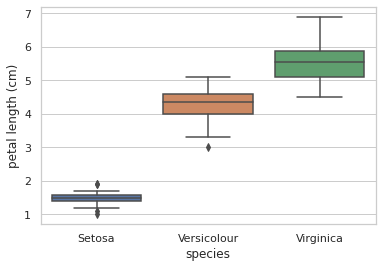

In [228]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='Target_Text', y='petal length (cm)', data=full_df)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

# Task 4

In [229]:
from sklearn import datasets
wine = datasets.load_wine()
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

**1.Histogram**

As discussed before, the histogram is used to display the disrbution of infromation over time. In this case we can exam the variable alcohol, magnesium and flavanoids.

From this histogram we can see the distribution and deviation for each variable. For alcohol the values are maninly between 12-14 with the results showing a normal distriution.
For flavanoids and magnesium have left skewed distribution. Flavanoids highest values at around 2. For magnesium the highest values are around 100.


In [230]:
import numpy as np
from sklearn import datasets
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)


#Conver to pandas dataframe
data=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])


data[['alcohol','magnesium', 'flavanoids']].hist()
data.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

           target  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

**2.Pair Plot**

Is a matrix of scatterplots pairplot which shows the relationships between the variables. The diagonal path has the the desity curve for the varibales. The corners has the scatter plot between ech variable.  Along with the correlation numbers we can see how the variables overlap each other. For example the magnesium and flavanoid have low corr 0.19 and in the plot doesn't overlay much. While the magnesium does overlay and has a higher corr value 0.27.

alcohol  magnesium  flavanoids    target
alcohol     1.000000   0.270798    0.236815 -0.328222
magnesium   0.270798   1.000000    0.195784 -0.209179
flavanoids  0.236815   0.195784    1.000000 -0.847498
target     -0.328222  -0.209179   -0.847498  1.000000

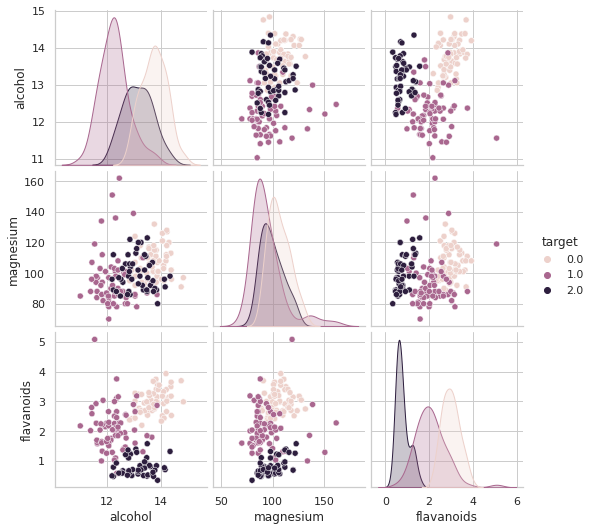

In [231]:
df=data[['alcohol','magnesium','flavanoids','target']]

#variable to different colours
g = sns.pairplot(df,hue='target')
g.map_upper(sns.scatterplot,color='red')
g.map_lower(sns.scatterplot, color='green')


# correlation values
df.corr()


**3. Heatmap**

A correlation heat map can crate a graph that disploys the correlation in between the variables in the dataset. It can help avoid problems where it is hard to determine the effect of the predictor in the set which can lead to  choosing the wrong variables that should be used e.g (multicollinearity).

To inerpret the below results we look at the side bar which indicates the correlation according to colour ergo the lighter the colour the higher the correlation. From first glance this chart doesnt seem to have high correlation accros the board and seems to have more average to low correlation. 

Now for a comparison I created a heatmap for the value of alcohol and magnesium and flavanoids to show the correlation on there own an the chart for that looks very different although the values for each variable remain the same. e.g for alcohol and magnesium we can see the corr value is 0.27  in both charts but its deep purple(indicate low corr) on the small chart and orange on the big chart(indicates high corr). This shows the imprtance of looking at which variables to select when using this visualisation method.




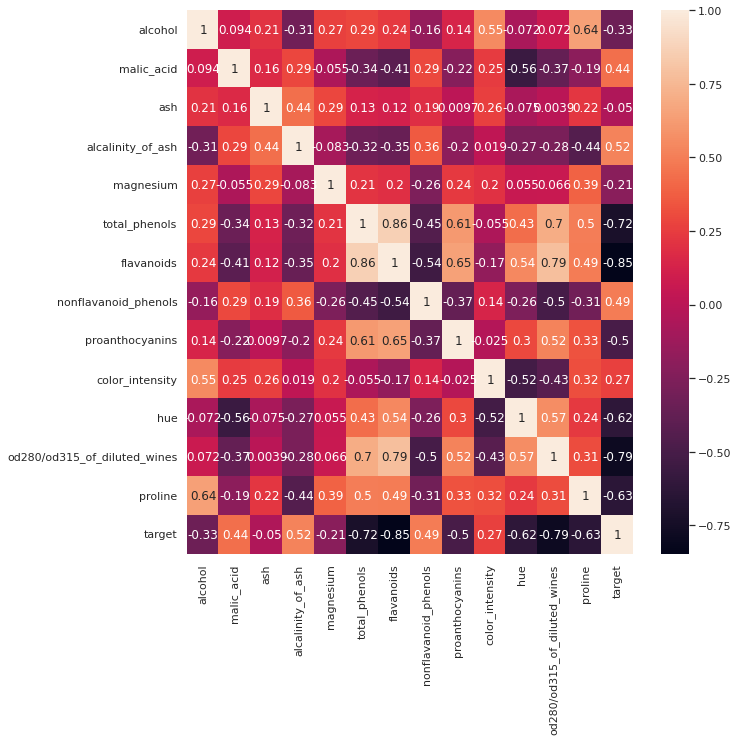

In [232]:
plt.figure(figsize=(10,10))
df=data[['alcohol','magnesium','flavanoids']]
sns.heatmap(data.corr(),color = 'k', annot = True)


In [233]:
plt.figure(figsize=(10,10))
df=data[['alcohol','magnesium','flavanoids']]
sns.heatmap(df.corr(),color = 'k', annot = True)

**4.Minimum Covariance Determinant(MCD)**

This method isn't as popular but is highely effective in my opinion.The MCD is a method that can estimate directional location and scatter of values. It is a method used in multivariate statistics i.e where there is 2 or more variables.

Its beneficial in outlier detector. It works by focusing on the mode of the distribution. It shows the emprical variances and the robust carince and this is the joint probability of these two variables which can be used to idenitfy an estimation for MCD that could be considered 'perfect'. The ocsvm is the one class svm.

To try and interpret the below results we can see 4 points that are clear outliers at points at approx 5.1 and 6.2, 0.5 and 10, 1.1 and 12, 1.3 and 13.

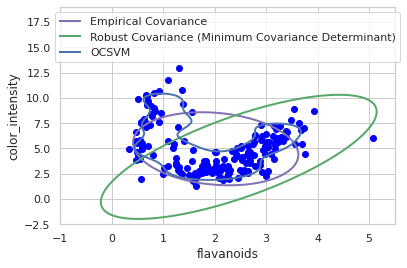

In [234]:
# Get data
X2 = load_wine()["data"][:, [6, 9]] 

# outlier detection with several classifiers
xx2, yy2 = np.meshgrid(np.linspace(-1, 5.5, 500), np.linspace(-2.5, 19, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(2)
    clf.fit(X2)
    Z2 = clf.decision_function(np.c_[xx2.ravel(), yy2.ravel()])
    Z2 = Z2.reshape(xx2.shape)
    legend2[clf_name] = plt.contour(
        xx2, yy2, Z2, levels=[0], linewidths=2, colors=colors[i]
    )

legend2_values_list = list(legend2.values())
legend2_keys_list = list(legend2.keys())


plt.figure(2)

plt.scatter(X2[:, 0], X2[:, 1], color="blue")
plt.xlim((xx2.min(), xx2.max()))
plt.ylim((yy2.min(), yy2.max()))
plt.legend(
    (
        legend2_values_list[0].collections[0],
        legend2_values_list[1].collections[0],
        legend2_values_list[2].collections[0],
    ),
    (legend2_keys_list[0], legend2_keys_list[1], legend2_keys_list[2]),
    loc="upper center",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.ylabel("color_intensity")
plt.xlabel("flavanoids")

plt.show()

**5.Box Plot**

Similar to before box plots we can take into account the outliers and interpret accordingly. Outliers are data values that deviate a lot from the the main data values. Outliers may be the cause of an error but they still should be removed to avoid bias in results and better intepretation

For the below results we can see the min and max value for each variable and its mean values.


*All these values are read of the chart so are approxiamtion not exact but the exact values can be seen from the describe() data above*

Alcohol has a min value of 11 and max value of 14.8 and a mean value of 13.
Magnesium has a min value of 70 and a max value of 161, however since there are outliers it can be said that the max is 130. It has a mean of 100.
Flavanoids has a min of .30 and a max of 5 with mean of 2.
We can see that like the hostogram we are able ot read the distrubtion. As bfore the alcohol has normal distribbution and the other two as skewed slightly to the left.


We can also see some outliers for magnesium between 130 and 161 which can be capped if needed.

In [235]:
plt.figure(figsize=(10,15))
for i, col in enumerate(list(df.columns.values)):
  plt.subplot(4,3,i+1)
  data.boxplot(col)
  plt.grid()
  plt.tight_layout()
  

# References
* Team, D. (2019, May 23). Data Scientist vs Data Engineer vs Data Analyst - What really differentiates them? - DataFlair. DataFlair. https://data-flair.training/blogs/data-scientist-vs-data-engineer-vs-data-analyst/#:~:text=A%20data%20analyst%20is%20responsible%20for%20taking%20actionable,data%20and%20helping%20companies%20to%20make%20data-driven%20decisions.

‌ 

*   Lee, J. (2021, April 12). Data Engineer, Data Analyst, Data Scientist — What’s the Difference? Dataquest. https://www.dataquest.io/blog/data-analyst-data-scientist-data-engineer/

*  Iffat Malik Gore. (2020, August 16). Writing Memory Efficient Programs Using Generators in Python. Medium; The Startup. https://medium.com/swlh/writing-memory-efficient-programs-using-generators-in-python-49854bb57da6


*  Erdem Isbilen. (2020, November 20). How to Code Memory Efficient Functions with Python Generators. Medium; Towards Data Science. https://towardsdatascience.com/how-to-code-memory-efficient-functions-with-python-generators-c1194dfe0294


* Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011. https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

* Hubert, M., Debruyne, M., & Rousseeuw, P. J. (2017). Minimum covariance determinant and extensions. WIREs Computational Statistics, 10(3). https://doi.org/10.1002/wics.1421

*  Spencer, A. (2022, April 9). 5 Minute EDA: Correlation Heatmap - 5 Minute EDA - Medium. Medium; 5 Minute EDA. https://medium.com/5-minute-eda/5-minute-eda-correlation-heatmap-b57bbb7bae14

‌
*  scikit-learn - Robust vs Empirical covariance estimate The usual covariance maximum likelihood estimate is very sensitive to presence of outliers in data set. (2012). Runebook.dev. https://runebook.dev/en/docs/scikit_learn/auto_examples/covariance/plot_robust_vs_empirical_covariance#:~:text=Robust%20vs%20Empirical%20covariance%20estimate%20The%20usual%20covariance,resistant%20to%20%E2%80%9Cerroneous%E2%80%9D%20observations%20in%20the%20data%20set.

‌

‌

‌

‌



‌